# Bayesian Model Mixing (BMM): Strong and weak coupling expansions

## Alexandra Semposki

### Date: 23 July 2021

In this notebook, I implement the class __Mixing__ and check to see what kind of results I can get with the orders ks = 5 and kl = 23. In the final version of this class/notebook/project, this should all be written into a package that a user can play with.

__Note__: If you would like to look at the docstring of any class function in Mixing or Switching, run the command 'help(function name)' to see the needed parameters and the general info on using the function. If you would like to see all of the available functions in a specific class, run the command 'dir(class name)'.

In [1]:
#import standard packages
import numpy as np
from scipy import special, integrate, stats
import math as math
import time as time
import matplotlib.pyplot as plt
%matplotlib inline

#import the classes
from class_expansions import Mixing, Switching
from priors import Priors

In [2]:
#run the class initialization to make sure it works
g_true = np.linspace(1e-6, 0.5, 100)
g_data = np.linspace(0.10, 0.2, 20)
loworder = np.array([5, 10, 20])
highorder = np.array([5, 10, 20])

first = Mixing()

Welcome to the BMM sandbox! Here you get to play!


In [3]:
#call the calculations for low and high g
result_low = first.low_g(g_true, loworder)
result_high = first.high_g(g_true, highorder)

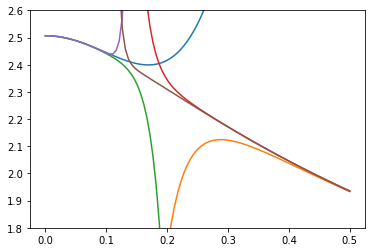

In [4]:
#checking the expansions to make sure the functions work
fig = plt.figure()
ax = plt.axes()
ax.set_ylim(1.8,2.6)
for i in range(3):
    plt.plot(g_true, result_low[i])
    plt.plot(g_true, result_high[i])

[ 5 10 20]


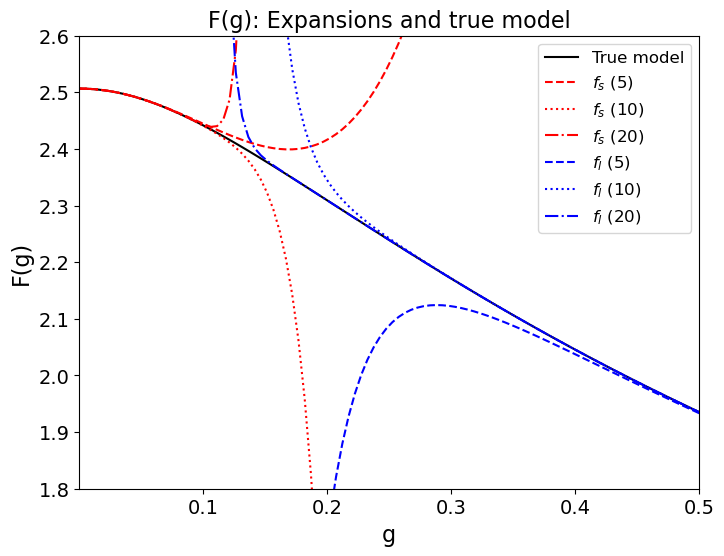

In [5]:
#running the plotting function to see how well it plots
print(loworder)
first.plot_models(g_true, loworder, highorder)

In [6]:
#now checking that multiple arrays will work
nlowk = np.array([5, 23, 50])
nhighk = np.array([5, 23, 50])

In [7]:
second = Mixing()

Welcome to the BMM sandbox! Here you get to play!


In [8]:
result_nlow = second.low_g(g_true, nlowk)

In [9]:
print(result_nlow)

[[ 2.50662827e+00  2.50643647e+00  2.50586224e+00  2.50490866e+00
   2.50358088e+00  2.50188608e+00  2.49983352e+00  2.49743449e+00
   2.49470235e+00  2.49165252e+00  2.48830246e+00  2.48467169e+00
   2.48078180e+00  2.47665641e+00  2.47232121e+00  2.46780395e+00
   2.46313441e+00  2.45834446e+00  2.45346799e+00  2.44854097e+00
   2.44360142e+00  2.43868941e+00  2.43384706e+00  2.42911856e+00
   2.42455014e+00  2.42019009e+00  2.41608876e+00  2.41229855e+00
   2.40887392e+00  2.40587137e+00  2.40334948e+00  2.40136886e+00
   2.39999219e+00  2.39928419e+00  2.39931167e+00  2.40014344e+00
   2.40185042e+00  2.40450556e+00  2.40818384e+00  2.41296235e+00
   2.41892018e+00  2.42613852e+00  2.43470058e+00  2.44469165e+00
   2.45619906e+00  2.46931220e+00  2.48412252e+00  2.50072351e+00
   2.51921074e+00  2.53968180e+00  2.56223636e+00  2.58697615e+00
   2.61400493e+00  2.64342854e+00  2.67535486e+00  2.70989383e+00
   2.74715744e+00  2.78725974e+00  2.83031684e+00  2.87644689e+00
   2.92577

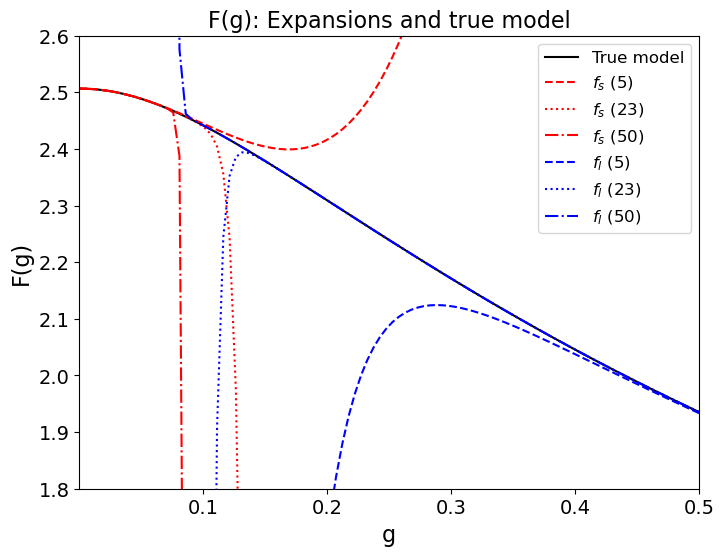

In [10]:
second.plot_models(g_true, nlowk, nhighk)

Data will be generated. What percent error would you like on your data (please enter a decimal)?0.01


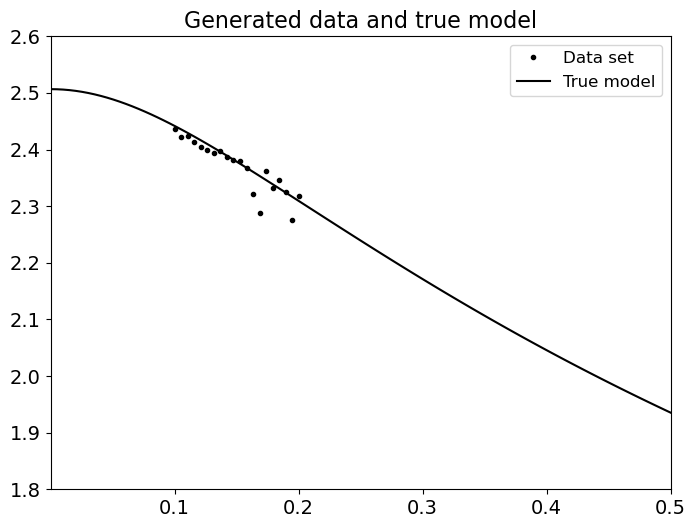

Data set:  [2.43650159 2.42299324 2.42337326 2.41389527 2.40451939 2.39984132
 2.39465644 2.39767746 2.38605599 2.38209406 2.37940024 2.36670549
 2.3208624  2.28803634 2.36153306 2.33180812 2.34534506 2.32460067
 2.27606407 2.31785335]
Standard deviations:  [0.02436502 0.02422993 0.02423373 0.02413895 0.02404519 0.02399841
 0.02394656 0.02397677 0.02386056 0.02382094 0.023794   0.02366705
 0.02320862 0.02288036 0.02361533 0.02331808 0.02345345 0.02324601
 0.02276064 0.02317853]


In [11]:
data = np.array([2.46534746, 2.41906332, 2.4371981,  2.43758332, 2.45508226, 2.43256716, \
                  2.3606467,  2.39643081, 2.38913794, 2.35902622, 2.38975985, 2.36837931, \
                  2.37086582, 2.34159688, 2.36703721, 2.31234851, 2.32826091, 2.35910483, \
                  2.29563753, 2.31964552])

sigma = np.array([0.02465347, 0.02419063, 0.02437198, 0.02437583, 0.02455082, 0.02432567, \
                  0.02360647, 0.02396431, 0.02389138, 0.02359026, 0.0238976,  0.02368379, \
                  0.02370866, 0.02341597, 0.02367037, 0.02312349, 0.02328261, 0.02359105, \
                  0.02295638, 0.02319646])

data, sigma = second.add_data(g_true, g_data)

print('Data set: ', data)
print('Standard deviations: ', sigma)

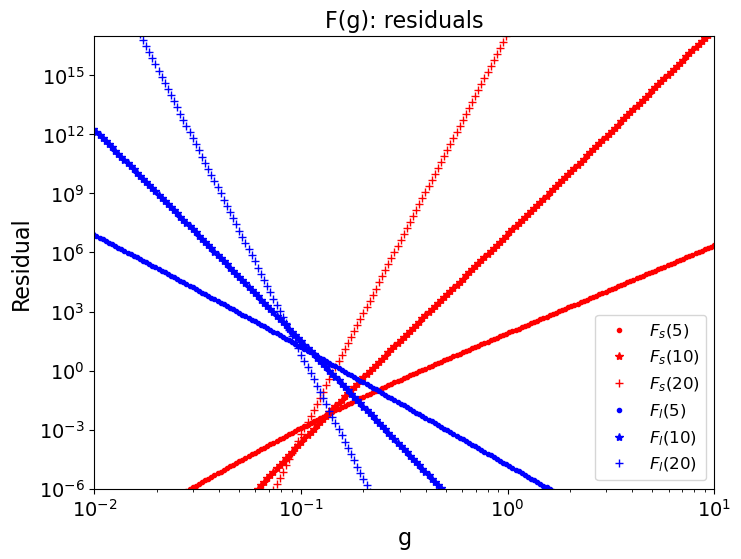

In [12]:
second.residuals(loworder, highorder)

In [13]:
#check functionality of likelihoods in the class
one = second.likelihood_low(g_data, data, sigma, loworder)
two = second.likelihood_high(g_data, data, sigma, highorder)

print('Small-g likelihoods: {} \n\nLarge-g likelihoods: {}'.format(one, two))

Small-g likelihoods: [[1.54959326e+001 1.30688906e+001 1.48423557e+001 1.34238562e+001
  1.16693013e+001 1.16219527e+001 1.12478635e+001 1.39343929e+001
  1.07689235e+001 1.03845386e+001 1.03108836e+001 5.91919981e+000
  5.36362089e-002 1.30345950e-004 4.62777873e+000 2.15792918e-001
  8.30121498e-001 3.58366095e-002 4.41194903e-007 2.04837290e-003]
 [1.60973693e+001 1.47201602e+001 1.62275025e+001 1.60212833e+001
  1.58974330e+001 1.65512682e+001 1.64762415e+001 1.18748757e+001
  1.00383716e+001 4.04062749e+000 5.07496880e-001 3.60605938e-002
  4.79703200e-002 8.37378475e-004 2.33713421e-023 2.99279929e-038
  2.92178437e-078 3.74540160e-136 3.78604540e-227 0.00000000e+000]
 [1.58175051e+001 1.31132741e+001 1.30752346e+001 5.22598429e+000
  5.65497595e-002 3.25098244e-011 3.96861679e-058 5.24773968e-279
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.0

Now we want to calculate the results of the mixed model for two specific orders: a small-g expansion up to 5th order, and a large-g expansion up to 23rd order.

In [14]:
low = np.array([5])
high = np.array([23])

In [15]:
trace = second.mixed_model(g_data, data, sigma, low, high)

What switching function would you like to use: logistic, cdf, or cosine?logistic
Using 7 walkers with 1000 steps each, for a total of 7000 samples.
Calculation finished!
Duration = 25 sec.
How many burn-in samples per walker?200
Using 200 samples as burn-in, for a total of 1400 burn-in samples.
(2, 5600)


In [16]:
print(trace)

[[  7.98355947   7.18889716   8.08133685 ...   7.87018208   7.87018208
    7.87018208]
 [-52.44917507 -49.07792331 -53.5128428  ... -60.73237059 -60.73237059
  -60.73237059]]


In [18]:
#print the mean of the trace
mean_g1 = np.mean(trace[0].T)
mean_g2 = np.mean(trace[1].T)
#mean_g3 = np.mean(trace[2].T)
print('Mean of g1: {}'.format(mean_g1))
print('Mean of g2: {}'.format(mean_g2))
#print('Mean of g3: {}'.format(mean_g3))

#calculate credible intervals 
ci_g1 = second.credible_intervals(trace[0], 0.95)
ci_g2 = second.credible_intervals(trace[1], 0.95)
#ci_g3 = second.credible_intervals(trace[2], 0.95)
print('Credible interval, g1: {}'.format(ci_g1))
print('Credible interval, g2: {}'.format(ci_g2))
#print('Credible interval, g3: {}'.format(ci_g3))

mean = np.array([mean_g1, mean_g2])#, mean_g3])
ci_g = np.array([ci_g1, ci_g2])#, ci_g3])

Mean of g1: 5.918481662545382
Mean of g2: -42.062378617562494
Credible interval, g1: [3.61211627 8.13887163]
Credible interval, g2: [-55.55402779 -27.41223132]


In [19]:
ndim = len(trace)

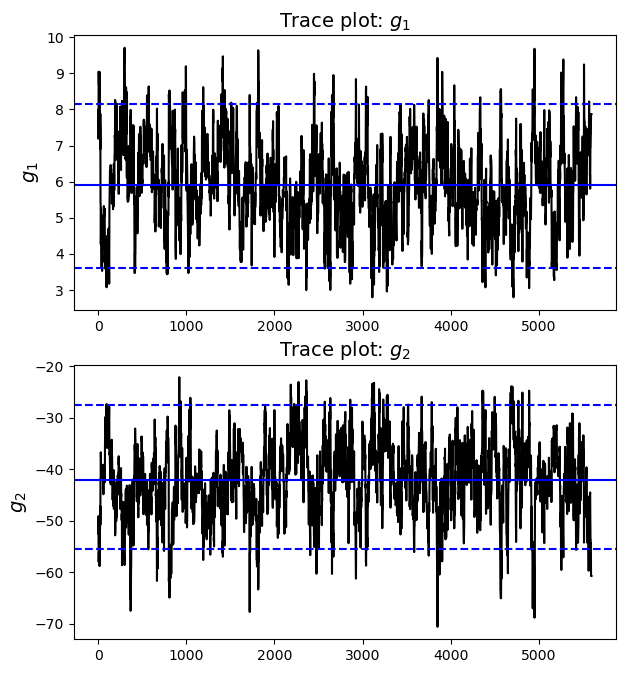

In [20]:
#plot the trace---finish later and put into a function to adjust for each result from the sampler
fig,ax = plt.subplots(ndim, 1, figsize=(7,4*ndim), dpi=100)

for i in range(ndim):
    ax[i].plot(trace[i].T, 'k')
    ax[i].set_ylabel(f'$g_{i+1}$', fontsize=14)
    ax[i].set_title(f'Trace plot: $g_{i+1}$', fontsize=14)

    ax[i].axhline(y=mean[i], color='b', linestyle='solid')
    ax[i].axhline(y=ci_g[i][0], color='b', linestyle='dashed')
    ax[i].axhline(y=ci_g[i][1], color='b', linestyle='dashed')

In [21]:
g_ppd = np.linspace(1e-6, 0.5, 100)

In [22]:
#calculate the ppd with intervals
switch_results_ppd = second.ppd(trace, g_ppd, low, high)

switch_mean_results = np.empty([len(g_ppd)])
switch_g_intervals = np.empty([len(g_ppd), 2])

for i in range(len(g_ppd)):
    switch_mean_results[i] = np.mean(switch_results_ppd[i,:])
    switch_g_intervals[i, :] = second.credible_intervals(switch_results_ppd[i,:], 0.95)

Enter the minimum g to plot.0.05
Enter the maximum g to plot.0.25
Enter the minimum for F(g).1.8
Enter the maximum for F(g).2.6


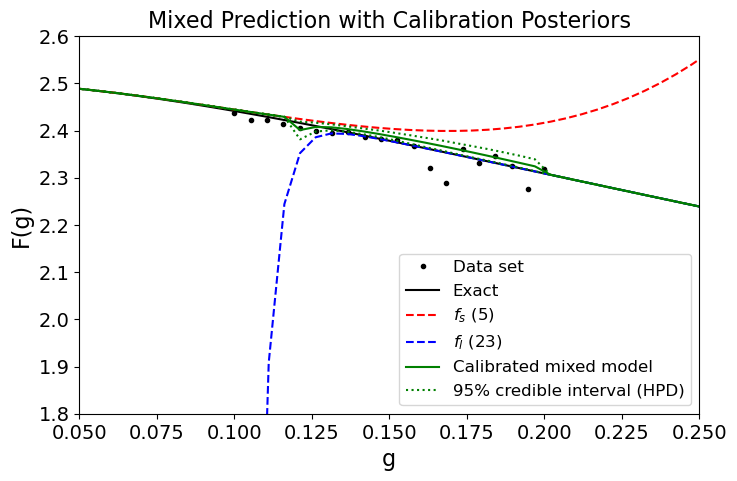

Would you like to save the plot to a file (yes/no)?no


In [23]:
second.plot_ppd(g_data, g_true, g_ppd, data, switch_mean_results, switch_g_intervals, 95, low, high)

The plot saves correctly now, after the user is able to see it to determine whether they wish to keep it in a file or not, which is exactly what is needed here. 